# Ford GoBike System Data Exploration
## by Pacifique Clement Ndayisenga

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [116]:
# Check the dataframe shape
df.shape

(183412, 16)

In [117]:
# Get more info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [118]:
# Check for unique values
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [119]:
# Check for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Data Cleaning

### 1. Missing values

#### Define

Drop missing value

#### Code

In [120]:
df.dropna(inplace=True)

#### Test

In [121]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [122]:
df.shape

(174952, 16)

### 2. Columns wrong data types

#### Define

- Convert start_time and end_time to datetime
- Convert member_bith_year, start_station_id, and end_station_id to integer and convert them and bike_id to string

#### Code

In [123]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_id'] = df.bike_id.astype(str)
df['member_birth_year'] = df.member_birth_year.astype(int)
df['start_station_id'] = df.start_station_id.astype(int)
df['start_station_id'] = df.start_station_id.astype(str)
df['end_station_id'] = df.end_station_id.astype(int)
df['end_station_id'] = df.end_station_id.astype(str)

#### Test

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [125]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


### What is the structure of your dataset?

- There was 183412 rides and 16 columns which was later dropped to 174952 and 16 columns
- In the 16 columns, there are 4 floats, 2 datetimes, 8 strings, and 2 integers (5 numerical and 11 categorical)

### What is/are the main feature(s) of interest in your dataset?

In this dataset, I am interested in:

- How trip duration is dependent on other features such as age, user type, user gender, and day of the week
- What time of the day, day of the week, and month of the year most trips are taken

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- member_birth_year will help to get user age and use it to see the influence on trip duration
- I believe start_station, end_station, user_type and member_gender have an impact on trip duration
- start_time and end_time will help me to get time of the day, day of the week, and month of the year most trips are taken.

## Univariate Exploration

### 1. What is the trip duration distribution

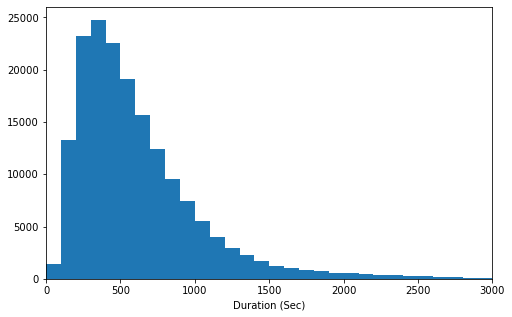

In [126]:
bins = np.arange(0, df['duration_sec'].max()+100, 100)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 3000]);

In [127]:
# Let's use log scale transformation because of a long tail
np.log10(df.duration_sec).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

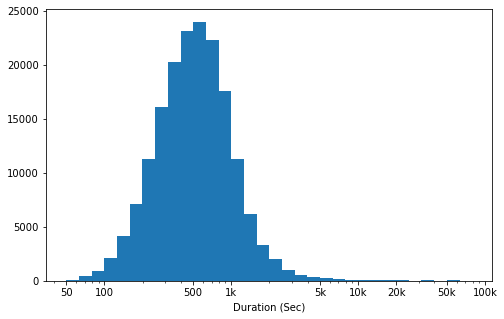

In [128]:
bins = 10 ** np.arange(1.7, 4.9 + 0.1, 0.1)
x_ticks = [50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5]
x_labels = [50, 100, 500, '1k', '5k', '10k', '20k', '50k', '100k']

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)')
plt.xscale('log')
plt.xticks(x_ticks, x_labels);

Many of the trips last between 300 and 1000 seconds

### 2. Ride frequency by days

In [129]:
# Get start and end hour, day, and month from start_time and end_time respectively
df['start_hour'] = df.start_time.dt.hour
df['start_hour'] = df.start_hour.astype(str)
df['end_hour'] = df.end_time.dt.hour
df['end_hour'] = df.end_hour.astype(str)

df['start_day'] = df.start_time.dt.day_name()
df['end_day'] = df.end_time.dt.day_name()

df['start_month'] = df.start_time.dt.month_name()
df['end_month'] = df.end_time.dt.month_name()

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day,end_day,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,17,8,Thursday,Friday,February,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,12,5,Thursday,Friday,February,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,17,4,Thursday,Friday,February,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,23,0,Thursday,Friday,February,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,23,0,Thursday,Friday,February,March


In [130]:
# convert day, and hour into ordered categorical types
categories = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
            'start_hour': [str(i) for i in range(0,24)],
            'end_hour': [str(i) for i in range(0,24)]}

for key in categories:
    category = pd.api.types.CategoricalDtype(ordered = True, categories = categories[key])
    df[key] = df[key].astype(category)

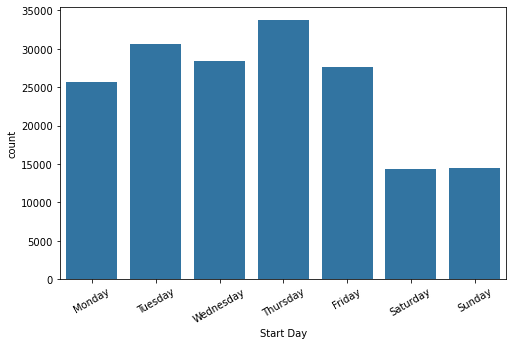

In [149]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = base_color)
plt.xticks(rotation=30)
plt.xlabel('Start Day');

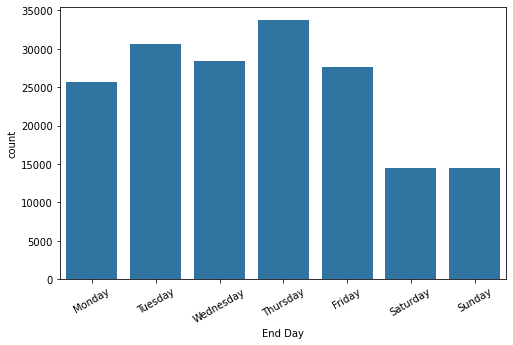

In [150]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_day', color = base_color)
plt.xticks(rotation=30)
plt.xlabel('End Day');

Most trips were taken on Thursdays and Tuesdays, and Weekend days has the lowest numbers of trips.

### 3. Ride frequency by hours

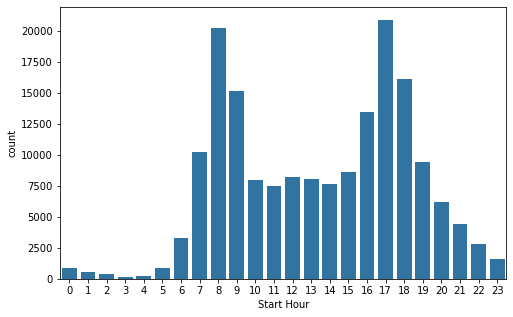

In [151]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.xlabel('Start Hour');

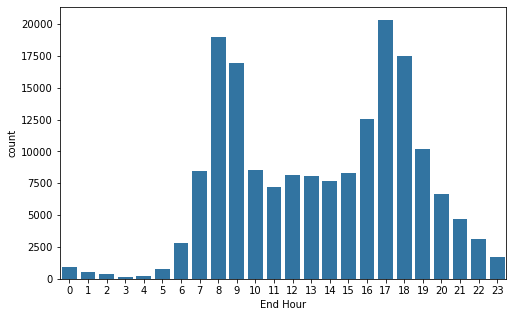

In [152]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_hour', color = base_color)
plt.xlabel('End Hour');

Most of the trips are taken in the moring hours(between 7AM and 10AM), and evening hours (between 4PM and 7PM)

### 4. Ride frequency by month

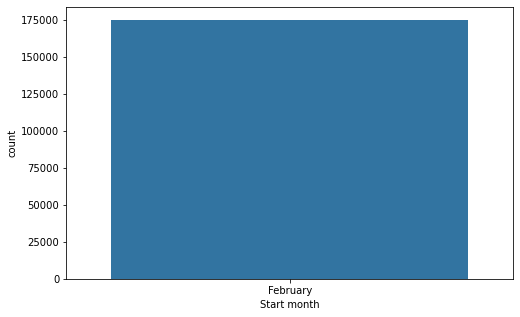

In [153]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color = base_color)
plt.xlabel('Start month');

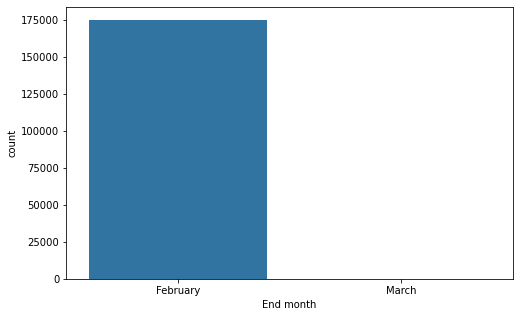

In [154]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_month', color = base_color, order = df.end_month.value_counts().index)
plt.xlabel('End month');

All of the available trips took place in February

### 5. User age distribution

In [137]:
df['age'] = 2019 - df.member_birth_year
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day,end_day,start_month,end_month,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,17,8,Thursday,Friday,February,March,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,12,5,Thursday,Friday,February,March,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,17,4,Thursday,Friday,February,March,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,23,0,Thursday,Friday,February,March,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,23,0,Thursday,Friday,February,March,60


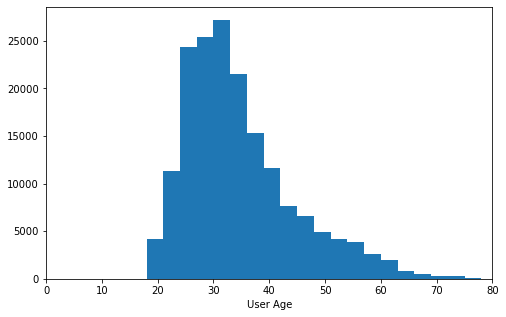

In [138]:
bins = np.arange(0, 80+3, 3)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('User Age')
plt.xlim([0, 80]);

Most trips are done by people are between 20 and 40 years old

### 6. Ride frequency by user type

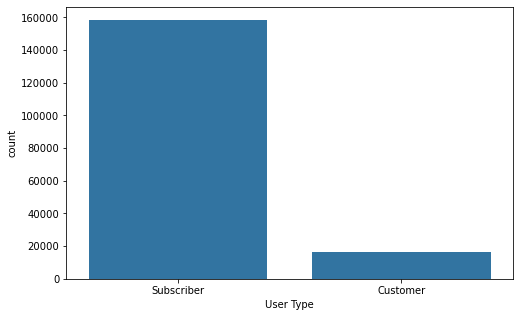

In [155]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
type_order = df.user_type.value_counts().index
sb.countplot(data = df, x = 'user_type', color = base_color, order = type_order)
plt.xlabel('User Type');

Most of the trips are done by users who have subscribed

### 7. Ride frequency by user gender

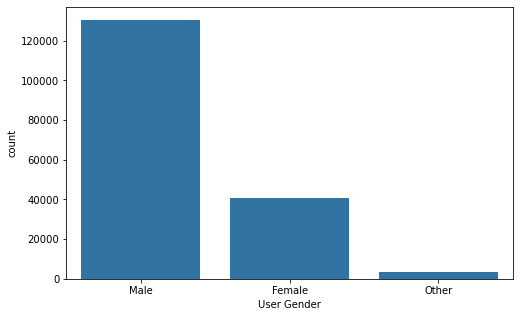

In [156]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
gender_order = df.member_gender.value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order = gender_order)
plt.xlabel('User Gender');

Most of the riders are male

### 8. Ride frequency by bike sharing for all trip

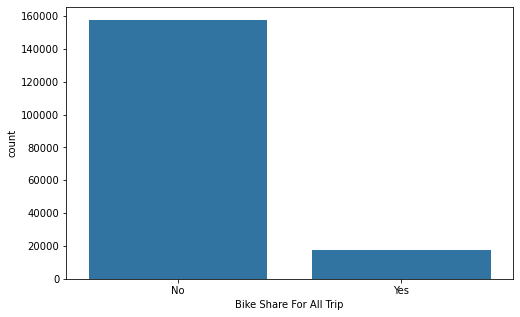

In [157]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
bike_share_order = df.bike_share_for_all_trip.value_counts().index
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = base_color, order = bike_share_order)
plt.xlabel('Bike Share For All Trip');

Most of the rides are non bike share for all trip

## Bivariate Exploration

### 1. Age vs Trip duration

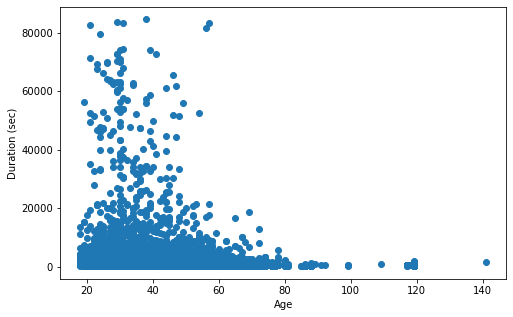

In [158]:
plt.figure(figsize=[8, 5])
plt.scatter(data = df, x = 'age', y = 'duration_sec')
plt.xlabel('Age')
plt.ylabel('Duration (sec)');

High duration is registered by young riders(most of them between 20 and 50)

### 2. Days vs Trip duration

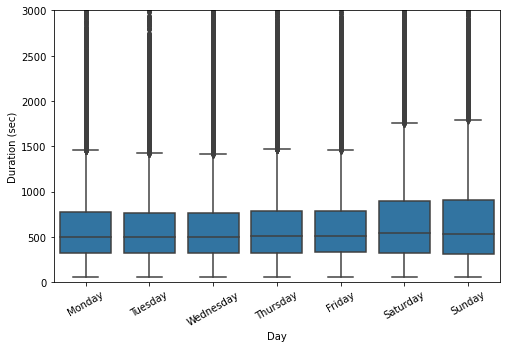

In [159]:
plt.figure(figsize=[8, 5])
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color);
plt.xlabel('Day')
plt.ylabel('Duration (sec)')
plt.xticks(rotation=30)
plt.ylim([0, 3000]);

Weekend trips take longer compared to the ones taken during the week

### 3. User type vs Trip duration

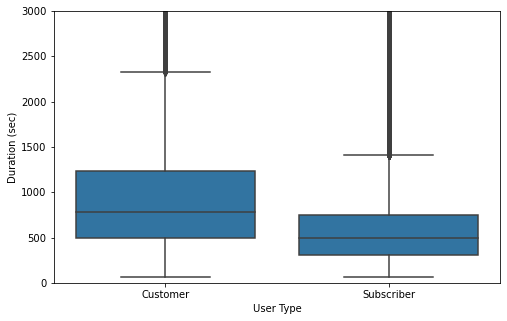

In [160]:
plt.figure(figsize=[8, 5])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color);
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.ylim([0, 3000]);

Customers spend more time than subscribers

### 4. Gender vs Trip duration

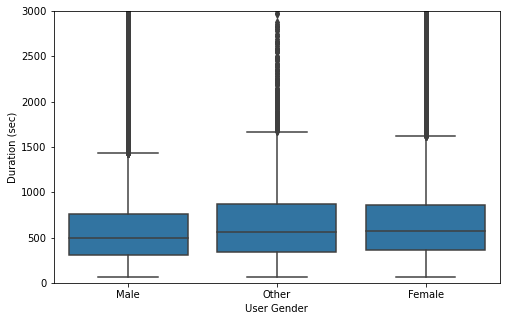

In [161]:
plt.figure(figsize=[8, 5])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color);
plt.xlabel('User Gender')
plt.ylabel('Duration (sec)')
plt.ylim([0, 3000]);

Female and other spend more time than male users

### 5. User type vs User gender

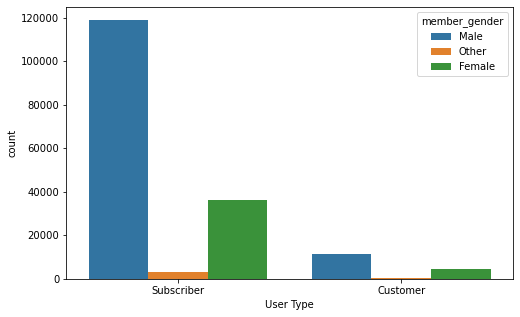

In [162]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', order = type_order);
plt.xlabel('User Type');

There are more male users in both user types than female and others

## Multivariate Exploration

### 1. Age vs Trip duration vs User type

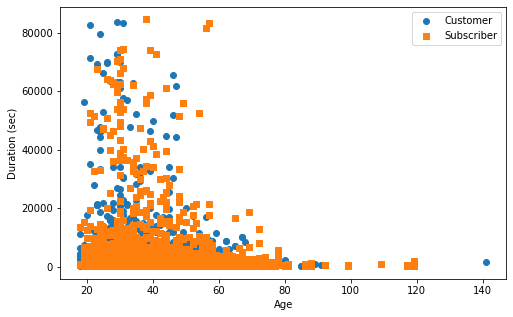

In [163]:
plt.figure(figsize=[8, 5])
user_type_markers = [['Customer', 'o'], ['Subscriber', 's']]

for user_type, marker in user_type_markers:
    df_user_type = df[df['user_type'] == user_type]
    plt.scatter(data = df_user_type, x = 'age', y = 'duration_sec', marker = marker)

plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.legend(['Customer', 'Subscriber']);

Both customer and subscriber users show similar trends for age and trip duration

### 2. Age vs Trip duration vs User Gender

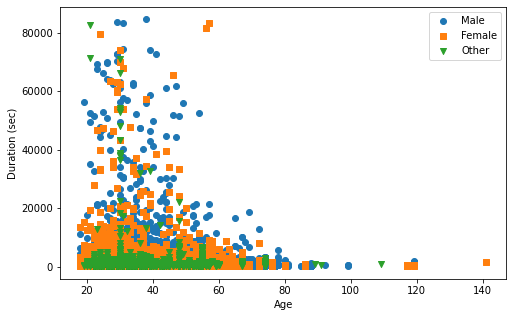

In [164]:
plt.figure(figsize=[8, 5])
member_gender_markers = [['Male', 'o'], ['Female', 's'], ['Other', 'v']]

for member_gender, marker in member_gender_markers:
    df_member_gender = df[df['member_gender'] == member_gender]
    plt.scatter(data = df_member_gender, x = 'age', y = 'duration_sec', marker = marker)

plt.xlabel('Age')
plt.ylabel('Duration (sec)')
plt.legend(['Male', 'Female', 'Other']);

All user genders show similar trends for age and trip duration

## Conclusions

- The average ride duration is around 500 seconds
- Most trip are taken on Thursdays and Tuesdays
- Weekend days have the lowest number of trips taken
- Most of the trips are taken in the moring hours(between 7AM and 10AM), and evening hours (between 4PM and 7PM)
- The dataset is just for the month of February
- Most of the trips are done by users who have subscribed
- Most of the riders are male
- Young riders spend more trip duration
- Weekend trips take longer compared to the ones taken during the week
- Customers ride longer  than subscribers
- Female and other genders spend more time during a trip than male users